<a href="https://colab.research.google.com/github/anandvimal/deeplearning-experiments/blob/master/cifar_10v1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Experiment 1.0 on CIFAR-10 dataset



In [0]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt

In [0]:
#cifar-10 is a set of 60k images each of 32*32 pixels on 3 channels(rgb)
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

In [0]:
#constatnts
BATCH_SIZE = 128
NB_EPOCH = 20
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()


In [14]:
#load dataset
(X_train, y_train), (X_test, y_test) =cifar10.load_data()
print('X_train shape: ',X_train.shape)
print(X_train.shape[0],'train samples')
print(X_test.shape[0], 'test samples')

X_train shape:  (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
# one hot encoding of labels
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

In [0]:
#Normalization of labels
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [17]:
# network/model
model = Sequential()

#starting with conv2d and maxpooling
model.add(Conv2D(32, (3,3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#flatten the model and use dense layers with dropout
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               4194816   
_________________________________________________________________
activation_9 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
__________

In [19]:
#train
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT, verbose=VERBOSE)


Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 79s 2ms/step - loss: 0.6820 - acc: 0.7658 - val_loss: 1.0577 - val_acc: 0.6620
Epoch 2/20
40000/40000 [==============================] - 79s 2ms/step - loss: 0.6350 - acc: 0.7790 - val_loss: 1.0799 - val_acc: 0.6637
Epoch 3/20
40000/40000 [==============================] - 79s 2ms/step - loss: 0.5927 - acc: 0.7934 - val_loss: 1.0653 - val_acc: 0.6685
Epoch 4/20
40000/40000 [==============================] - 79s 2ms/step - loss: 0.5541 - acc: 0.8094 - val_loss: 1.0251 - val_acc: 0.6739
Epoch 5/20
40000/40000 [==============================] - 80s 2ms/step - loss: 0.5154 - acc: 0.8220 - val_loss: 1.0336 - val_acc: 0.6764
Epoch 6/20
40000/40000 [==============================] - 79s 2ms/step - loss: 0.4919 - acc: 0.8299 - val_loss: 1.1271 - val_acc: 0.6709
Epoch 7/20
40000/40000 [==============================] - 79s 2ms/step - loss: 0.4615 - acc: 0.8399 - val_loss: 1.0973 - val_acc

In [20]:
score = model.evaluate(X_test, Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print('Test score/loss: ',score[0])
print('Test accuracy: ',score[1])


10000/10000 [==============================] - 6s 605us/step
Test score/loss:  1.5566324775695801
Test accuracy:  0.6611


In [21]:
#list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


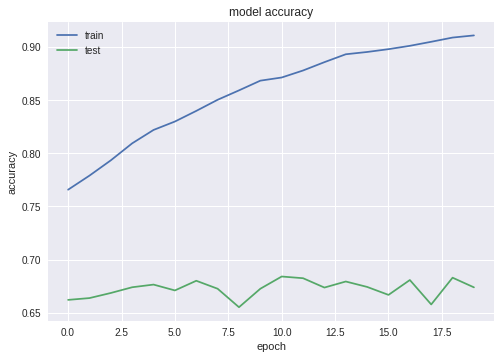

In [22]:
#plot for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

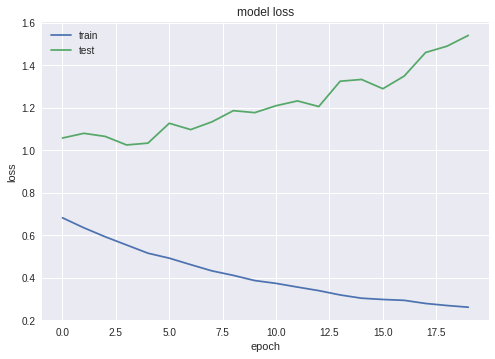

In [24]:
#plot for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [0]:
#save model
model_json = model.to_json()
open('cifar10_architecture.json','w').write(model_json)
#and the weights learned by our deep netowrk on the training set
model.save_weights('cifar10_weights.h5', overwrite=True)